# Student: McLaughlin, Chris

# Problem 3 - Associations

## Notes/README
- Notebook is heavy on memory usage and MUST be run in an environment with sufficient RAM - Assignment was done in Google Collab!

## Acknowledgements/Citations

- Lecture 20 Notes - Association
- https://www.geeksforgeeks.org/apriori-algorithm/
- https://en.wikipedia.org/wiki/Apriori_algorithm
- https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe
- https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements
- https://www.youtube.com/watch?v=7oGz4PCp9jI
- https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/
- https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index
- https://stackoverflow.com/questions/62330833/pandas-split-dataframe-by-unique-column-value
- https://www.kaggle.com/code/priy998/market-basket-analysis-using-apriori-algorithm
- https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func
- https://zaxrosenberg.com/unofficial-apyori-documentation/
- https://stackoverflow.com/questions/42462530/how-to-replace-the-white-space-in-a-string-in-a-pandas-dataframe
- https://www.geeksforgeeks.org/concatenate-strings-from-several-rows-using-pandas-groupby/
- https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
- https://intellipaat.com/blog/data-science-apriori-algorithm/
- https://levelup.gitconnected.com/how-to-solve-the-apriori-algorithm-in-a-simple-way-from-scratch-9540cfc5c11a
- https://stackoverflow.com/questions/5234090/how-to-take-the-first-n-items-from-a-generator-or-list

## Setup

In [1]:
# This should be roughly the content of the first code cell
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [2]:
# Plotting support
from matplotlib import pyplot as plt
#from plotnine import *
# Standard libraries
import pandas as pd
#import sklearn as sk
from itertools import combinations

## a) Manual

### Notes and Data Setup

Note: minsup = 30%

In [3]:
# Conversion to numeric binary representation ala slide 3 of lecture:
# Row: (Student ID, 101, 503, bioinformatics, 330, 482)
tb = [
    ("StudentID", "101", "503", "bioinformatics", "330", "482"),
    ("X1",1,1,0,1,1),
    ("X2",0,1,1,1,0),
    ("X3",1,1,0,1,1),
    ("X4",1,0,1,1,1),
    ("X5",0,1,1,1,1),
    ("X6",0,1,0,1,1),
    ("X7",0,0,1,1,0),
    ("X8",1,1,1,0,0),
    ("X9",1,0,0,1,1),
    ("XA",0,1,0,1,0)
]

bintable = pd.DataFrame(tb)
bintable = bintable.rename(columns=bintable.iloc[0]).drop([0]).reset_index().drop(columns=["index"])
bintable

StudentID 101 503 bioinformatics 330 482
0        X1   1   1              0   1   1
1        X2   0   1              1   1   0
2        X3   1   1              0   1   1
3        X4   1   0              1   1   1
4        X5   0   1              1   1   1
5        X6   0   1              0   1   1
6        X7   0   0              1   1   0
7        X8   1   1              1   0   0
8        X9   1   0              0   1   1
9        XA   0   1              0   1   0

### I)

This is the itemset lattice for this data!

A3-lattice.drawio.svg

We need to figure out which itemsets are frequent, infrequent, and non-considered

Here are some forumlas from the lecture slides:

Support count: $ \sigma(X) \text{ for some itemset } X = \text{ number of times } X \text{ occurs as a subset of some transaction} $

Support: $ s(X \rightarrow Y) = \sigma(X \cup Y)/N \text{ where } X \text{ and } Y \text{ are disjoint itemsets and N is the total number of transactions}$

Confidence: $ c(X \rightarrow Y) = \sigma (X \cup Y)/\sigma(X)$

So, we will find all itemsets where support is at least our minsup of 30%. With a 30% minsup and 10 transactions, our minimum support count is 3.

What we'll do, is generate a table with all possible combinations of our singleton itemsets, with each entry in that table representing a node in our lattice, then for each entry determine the support count. Any with at least 3 will be marked as F for frequent, any with 0 will be marked N for non-candidate, and the remainder will be marked I for infrequent.

In [4]:
# Credit to stackoverflow in acknowledgements for how to generate combinations
def getAllSubsets(inset):
  subsets=[]
  for length in range(len(inset)+1):
    for combo in combinations(inset, length):
      subsets.append(combo)
  return subsets

# Create table of transactions without Student ID - similar to binary table
transactions = (
    ("101","503","330","482"),
    ("503","bioinformatics", "330"),
    ("101","503","330","482"),
    ("101","bioinformatics","330","482"),
    ("503","bioinformatics","330","482"),
    ("503","330","482"),
    ("bioinformatics","330"),
    ("101","503","bioinformatics"),
    ("101","330","482"),
    ("503","330"),
)

itemsettable={}
singletons = ["101", "503", "bioinformatics", "330", "482"]
# Credit to stackoverflow in acknowledgements for how to generate combinations
itemsets = getAllSubsets(singletons) # Each entry in itemsets corresponds to a node in the itemset lattice!
for itemset in itemsets:
  if itemset not in itemsettable:
    itemsettable[itemset] = 0
  for transaction in transactions:
    if itemset in getAllSubsets(transaction):
      itemsettable[itemset]+=1

itemsettable

{(): 10,
 ('101',): 5,
 ('503',): 7,
 ('bioinformatics',): 5,
 ('330',): 9,
 ('482',): 6,
 ('101', '503'): 3,
 ('101', 'bioinformatics'): 2,
 ('101', '330'): 4,
 ('101', '482'): 4,
 ('503', 'bioinformatics'): 3,
 ('503', '330'): 6,
 ('503', '482'): 4,
 ('bioinformatics', '330'): 4,
 ('bioinformatics', '482'): 2,
 ('330', '482'): 6,
 ('101', '503', 'bioinformatics'): 1,
 ('101', '503', '330'): 2,
 ('101', '503', '482'): 2,
 ('101', 'bioinformatics', '330'): 1,
 ('101', 'bioinformatics', '482'): 1,
 ('101', '330', '482'): 4,
 ('503', 'bioinformatics', '330'): 2,
 ('503', 'bioinformatics', '482'): 1,
 ('503', '330', '482'): 4,
 ('bioinformatics', '330', '482'): 2,
 ('101', '503', 'bioinformatics', '330'): 0,
 ('101', '503', 'bioinformatics', '482'): 0,
 ('101', '503', '330', '482'): 2,
 ('101', 'bioinformatics', '330', '482'): 1,
 ('503', 'bioinformatics', '330', '482'): 1,
 ('101', '503', 'bioinformatics', '330', '482'): 0}

Cool! Here we can see a dictionary entry for every node in the lattice, along with its number of occurances in the transactions.

Now we go back and change out diagram, marking all nodes with 0 with N, 1-2 with I, and 3+ with F!

A3-lattice_2.drawio.svg

### II)

Let's calculate the percentage of frequent itemsets (out of all itemsets in the lattice)

In [5]:
F = 16
numall = len(itemsettable)
100*F/numall

50.0

And we can see exactly 50% of the itemsets are frequent!

### III)

Pruning Ratio:
$ \frac{N}{totalNumItemsets} = \frac{3}{32} = 0.09375 $

### IV)

False Alarm Rate: $ \frac{I}{F+I} = \frac{13}{13+16} = 0.44827586206 $

### V)

Let's do an FP-Tree. First we need a sorted support count table of all singleton itemsets! Our support count minimum is still 3!

In [6]:
sortedsupport = bintable.sum().drop(labels="StudentID").sort_values(ascending=False)
sortedsupport

330               9
503               7
482               6
101               5
bioinformatics    5
dtype: object

Now we'll create our ordered itemset table from our original transaction table

In [7]:
transactions

(('101', '503', '330', '482'),
 ('503', 'bioinformatics', '330'),
 ('101', '503', '330', '482'),
 ('101', 'bioinformatics', '330', '482'),
 ('503', 'bioinformatics', '330', '482'),
 ('503', '330', '482'),
 ('bioinformatics', '330'),
 ('101', '503', 'bioinformatics'),
 ('101', '330', '482'),
 ('503', '330'))

|ID|Items|Ordered Items|
|---|---|---|
|X1|101, 503, 330, 482|330, 503, 482, 101|
|X2|503, bioinformatics, 330|330, 503, bioinformatics|
|X3|101, 503, 330, 482|330, 503, 482, 101|
|X4|101, bioinformatics, 330, 482|330, 482, 101, bioinformatics|
|X5|503, bioinformatics, 330, 482|330, 503, 482, bioinformatics|
|X6|503, 330, 482|330, 503, 482|
|X7|bioinformatics, 330|330, bioinformatics|
|X8|101, 503, bioinformatics|503, 101, bioinformatics|
|X9|101, 330, 482|330, 482, 101|
|XA|503, 330|330, 503|


Credit to lecture 20 slides and youtube walkthrough linked in acknowledgements for how to do this algorithm

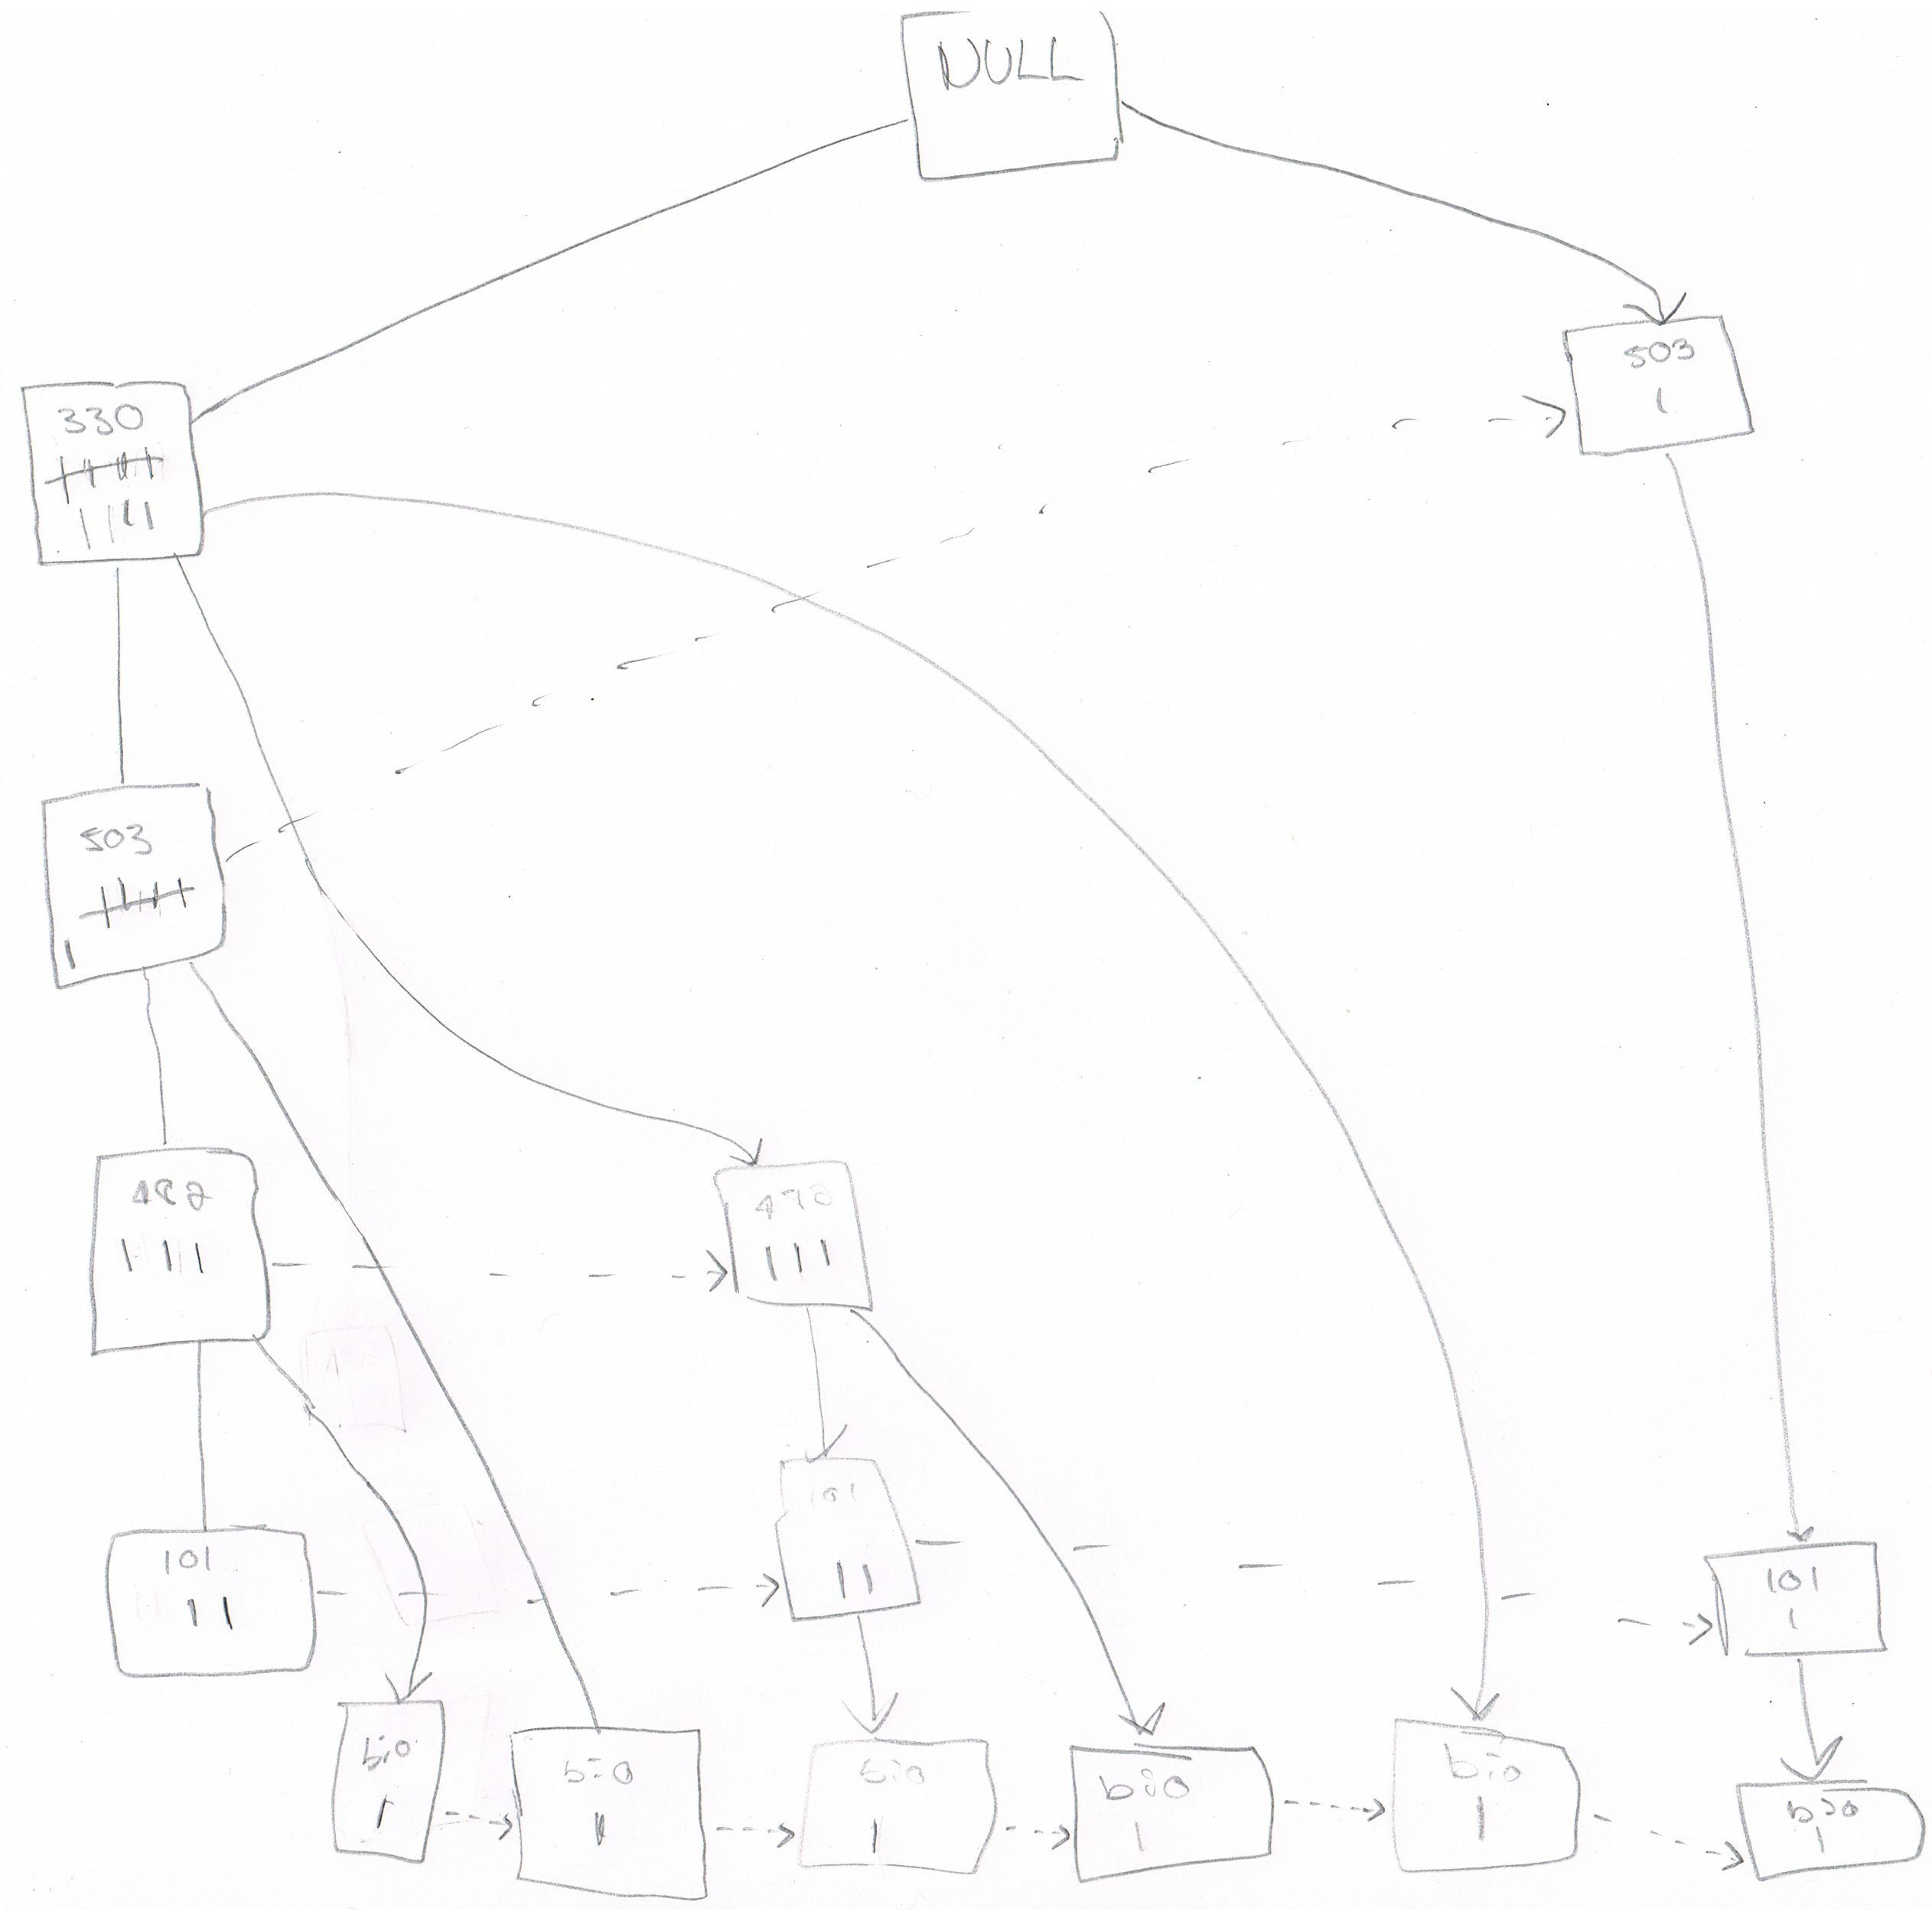

Now we'll mine the recursive datasets via FP-Growth

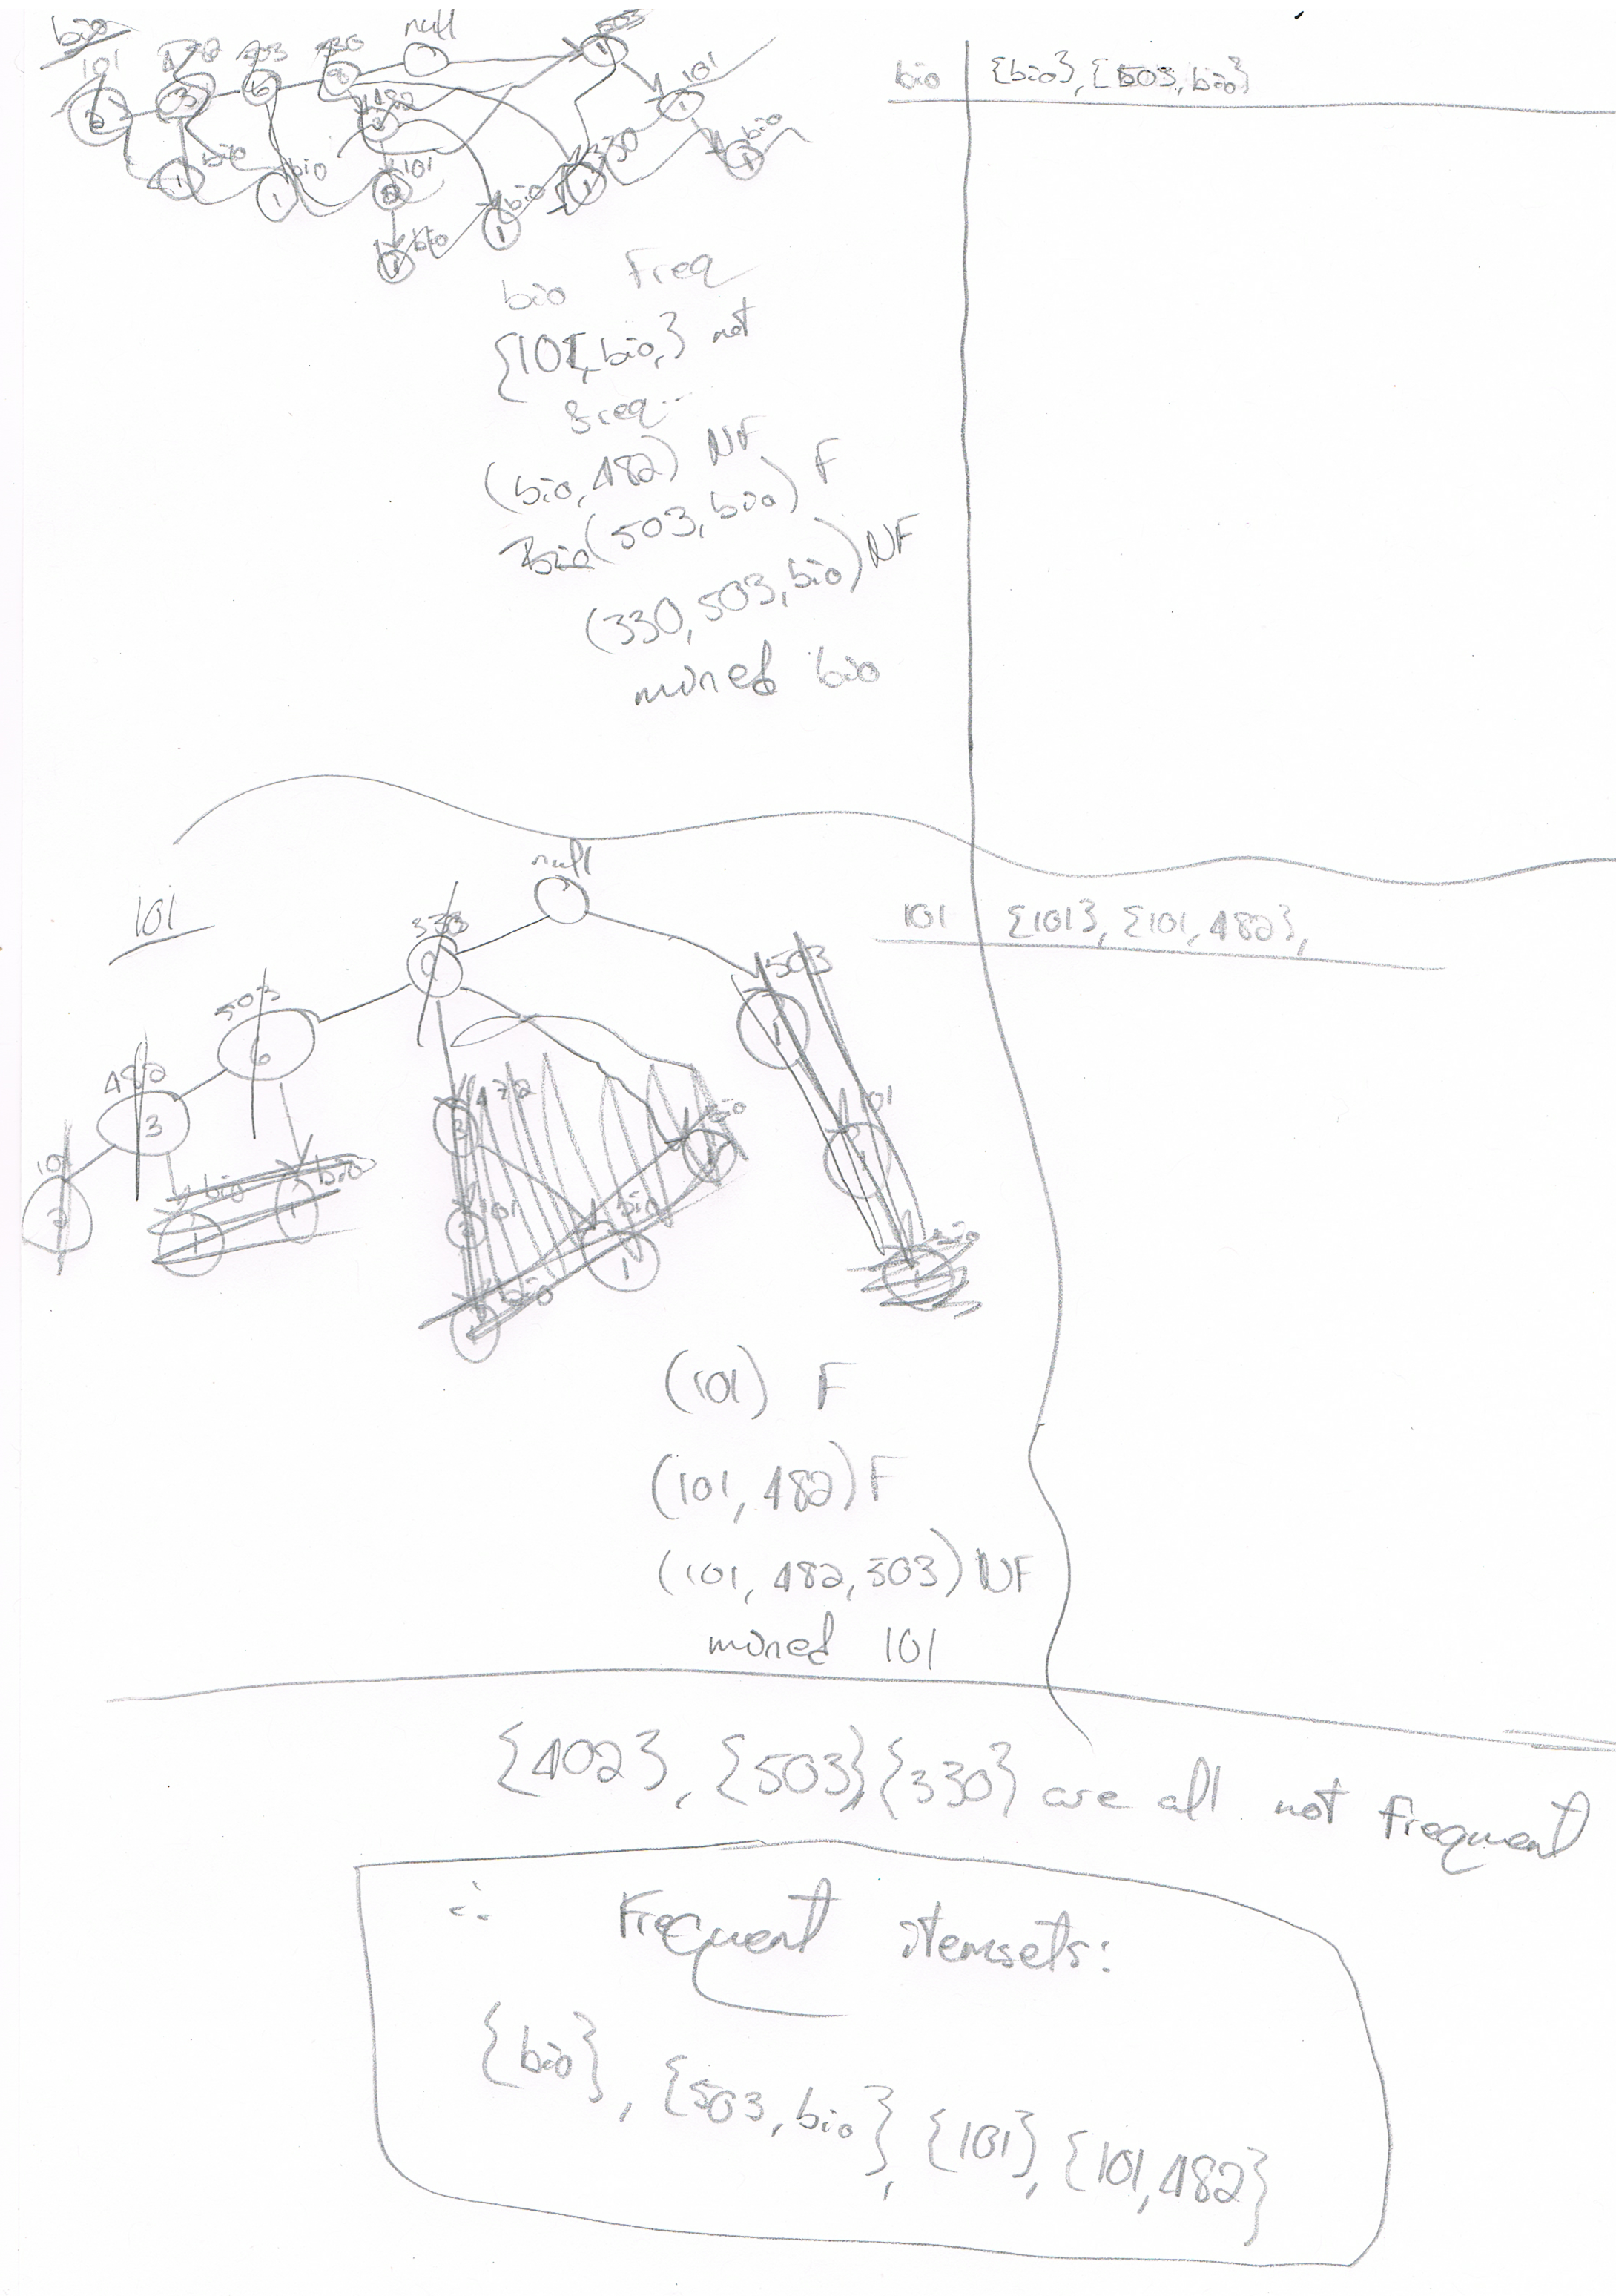

## b) Retail

Let's move on to retail data and apyori!

In [8]:
!pip install apyori
import apyori

retail = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx")
retail

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=1364745bae17449bb9b59fd05b3b0127773576ef8756204c043ea53ce365f50d
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom  

[525461 rows x 8 columns]

We need to do a lot of processing here. We're going to aggregate the data around Invoice IDs, first replacing spaces in all producs with underscores and then merging all producs in a transaction into a single space seperated field. 

Then we'll split our data into seperate dataframes for each country present in the data.

Thankfully, Aypyori is expecting our data in simple list-of-lists format, so we do not need to onehot or binary encode the data.

In [25]:
# Aggregate Data on Invoice Number - Replace spaces with underscores in product names then merge names to a single product string for all invoices, with products seperated by spaces
retailproc=retail.drop(columns=["StockCode", "Quantity", "InvoiceDate", "Price", "Customer ID"])
retailproc["Description"] = retailproc["Description"].astype(str) # Ensure all descriptions are strings
retailproc["Description"] = retailproc["Description"].replace(" ", "_", regex=True) # Shoutout to stack overflow on replacing whitespace for the tip on regex - link in acknowledgements
retailproc["Product"] = retailproc.groupby(["Invoice"])["Description"].transform(lambda x: " ".join(x)) # Likewise shoutout to a different stackover flow page for how to aggregate in such a way that string values are concatenated
retailproc = retailproc.drop(columns=["Description"]).drop_duplicates()
#retailproc

# This is the point where we split the dataframe into frames for each country
country_dfs={}
country_dfs_list = [frame for _, frame in retailproc.groupby(["Country"])] # This little functions framework is from a stackoverflow page linked in acknowledgements!
for df in country_dfs_list:
  country_dfs[df["Country"].iloc[0]] = df.drop(columns=["Country"])

# Convert to simple array of arrays - each first order array entry is a transaction, each second order array entry is a product
for country in country_dfs:
  array=[]
  for transaction in country_dfs[country]["Product"]: # This will be an iteration over a series of strings - we can completely ignore the Invoice number now
    array.append(transaction.split())
  country_dfs[country] = array

# Get and store results
results={}
for country in country_dfs: # Credit to Kaggle and intellipaat articles linked in acknowlegements for demonstrating how to actually use Pyori
  associations = apyori.apriori(country_dfs[country], min_support=0.30, min_confidence=0.5, min_lift=1.2, min_length=2, max_length=2)
  result = [x for _, x in zip(range(5), associations)] # Credit to stackoverflow linked in acknowledgements for how to get first 5 from generator if they exist
  results[country] = result

# Nicely display results - Credit to Kaggle article linked in acknowledgements for general framework of this
print("DISPLAYING UP TO TOP 5 ASSOCIATIONS FOR EACH COUNTRY\n=====================================================")
for country in results:
  print("Country: ", country)
  if results[country] == []:
    print("No associations with current hyperparameters for", country)
  else:
    for item in results[country]:
      itemset = item[0]
      items = [x for x in itemset]

      print("Association:", items[0], "-->", items[1])
  print("") #Newline

DISPLAYING UP TO TOP 5 ASSOCIATIONS FOR EACH COUNTRY
Country:  Australia
No associations with current hyperparameters for Australia

Country:  Austria
No associations with current hyperparameters for Austria

Country:  Bahrain
No associations with current hyperparameters for Bahrain

Country:  Belgium
No associations with current hyperparameters for Belgium

Country:  Bermuda
No associations with current hyperparameters for Bermuda

Country:  Brazil
No associations with current hyperparameters for Brazil

Country:  Canada
Association: 36_PENCILS_TUBE_SKULLS --> 36_PENCILS_TUBE_RED_RETROSPOT
Association: 36_PENCILS_TUBE_RED_RETROSPOT --> BIRD_DECORATION_RED_RETROSPOT
Association: 36_PENCILS_TUBE_RED_RETROSPOT --> BLUE_POLKADOT_CUP
Association: 36_PENCILS_TUBE_RED_RETROSPOT --> BLUE_POLKADOT_PLATE_
Association: CARD,_BILLBOARD_FONT --> 36_PENCILS_TUBE_RED_RETROSPOT

Country:  Channel Islands
No associations with current hyperparameters for Channel Islands

Country:  Cyprus
No association

And we can see some associations emerge for countries with sufficient data! Surprisingly, celebratory items such as one might use for a kid's birthday party or a Christmas event seem to be the strongest associated items in several countries, while cups are strongly associated with pencils in a handful of other countries (maybe as pencil holders?)